In [1]:
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, roc_curve, auc



In [3]:
#import the dataset
data=pd.read_csv(r"/content/data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,0.00
mean,30371831.43,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08,NaN
std,125020585.61,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02,NaN
min,8670.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06,NaN
25%,869218.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07,NaN
50%,906024.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08,NaN
75%,8813129.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09,NaN
max,911320502.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21,NaN


In [6]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
X = data.drop(['id', 'Unnamed: 32', 'diagnosis'], axis = 1)
y = data['diagnosis']



In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Preprocessing: Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)



In [9]:
# Initialize and fit the LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train_resampled, X_test_scaled, y_train_resampled, y_test)


 97%|█████████▋| 28/29 [00:02<00:00, 15.94it/s]

[LightGBM] [Info] Number of positive: 286, number of negative: 286
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5530
[LightGBM] [Info] Number of data points in the train set: 572, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

100%|██████████| 29/29 [00:02<00:00, 11.69it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [10]:
# Extract the accuracy scores from the models DataFrame
accuracy_scores = models['Accuracy']


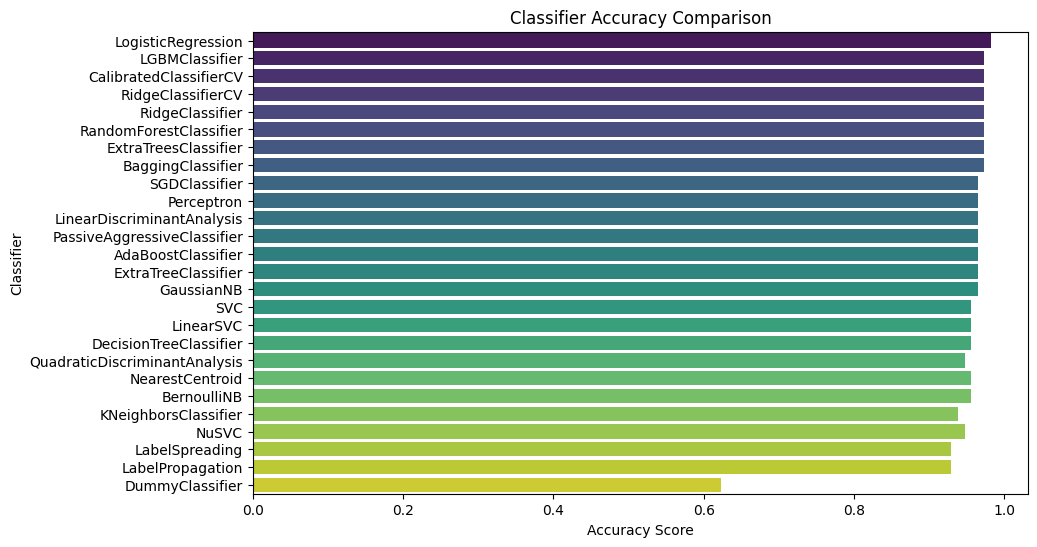

In [11]:
# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=accuracy_scores.index, palette='viridis')
plt.xlabel('Accuracy Score')
plt.ylabel('Classifier')
plt.title('Classifier Accuracy Comparison')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)



LogisticRegression()

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9736842105263158


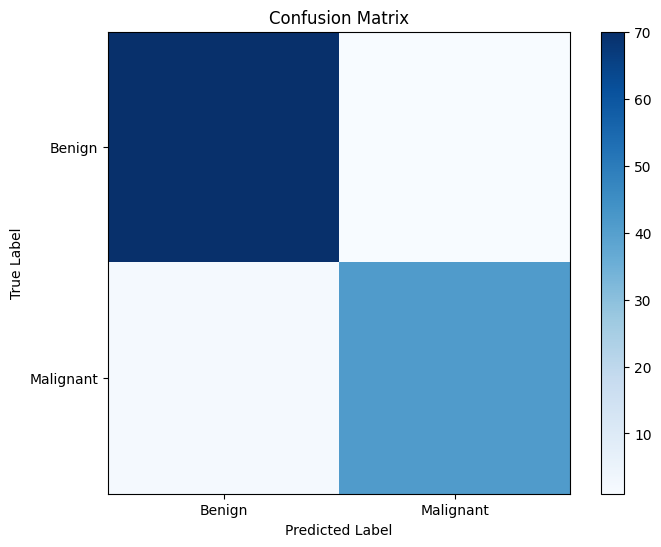

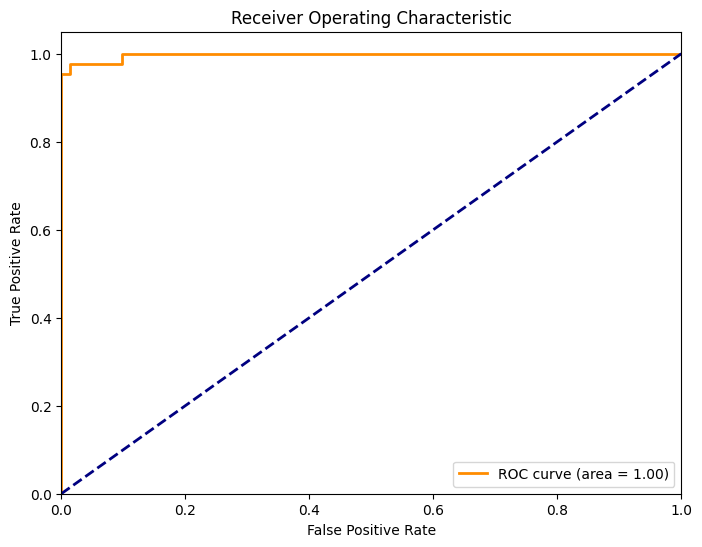

In [14]:

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert target labels to binary (0 for benign, 1 for malignant)
y_test_binary = np.where(y_test == 'M', 1, 0)
y_pred_binary = np.where(y_pred == 'M', 1, 0)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
